# Murder weapons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the sparse transcript count matrix

In [2]:
matrix = None
with open("matrix.mtx", "r") as f:
    first_line = True
    for line in f:
        if "%" in line:
            continue
        line = [int(i) for i in line.rstrip().split()]
        if first_line:
            x, y, count = line
            first_line = False
            matrix = np.ndarray(shape=(x,y))
        else:
            x, y, count = line
            matrix[x-1, y-1] = count

In [3]:
matrix.shape

(33694, 12318)

Note, we first index by genes (33694), and then by cells (12318)

# Load batch labels

In [4]:
with open("barcodes.tsv") as f:
    batches = {}
    for i, barcode_batch in enumerate(f):
        barcode, batch = barcode_batch.rstrip("\n").split("-")
        indices = batches.setdefault(batch, [])
        indices.append(i)

As expected, the last batch label is 12317, one less than the number of cells

In [5]:
batches["2"][-1]

12317

# Load gene ids

In [6]:
gene_ids = []
gene_names = []
with open("genes.tsv") as f:
    for id_gene in f:
        gene_id, gene_name = id_gene.split()
        gene_ids.append(gene_id)
        gene_names.append(gene_name)

As expected, the number of genes is equal to the number of genes.

In [7]:
len(gene_names)

33694

# Check if there is a significant coverage disparity between batches

In [8]:
batch_1 = matrix[:,batches["1"]]

In [9]:
batch_2 = matrix[:,batches["2"]]

In [10]:
cell_count_1 = batch_1.sum(0)

In [11]:
cell_count_2 = batch_2.sum(0)

This is the number of cells in the first batch

In [12]:
len(cell_count_1)

5245

This is the number of cells in the second batch

In [13]:
len(cell_count_2)

7073

# Scale histograms by the number of cells

In [14]:
len(cell_count_1)//50

104

In [15]:
len(cell_count_2)//50

141

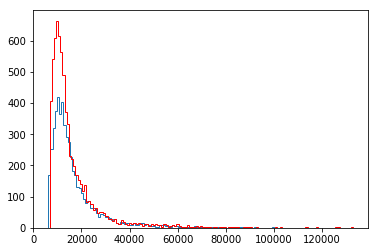

In [17]:
plt.hist(cell_count_1, bins=len(cell_count_1)//50, histtype='step')
plt.hist(cell_count_2, bins=len(cell_count_2)//50, histtype='step', color="r")
pass

# Underscale the first batch

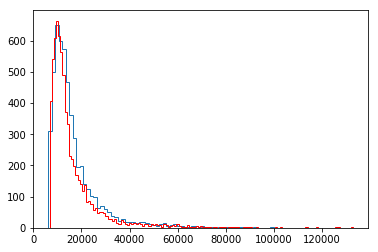

In [19]:
plt.hist(cell_count_1, bins=len(cell_count_1)//80, histtype='step')
plt.hist(cell_count_2, bins=len(cell_count_2)//50, histtype='step', color="r")
pass